In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [5]:
import cupy as cp

In [6]:
# with h5py.File(SRBF_PATH, 'r') as f:
#     logflux = f['logflux'][()]
#     normflux = f['normflux'][()]
#     pc = f['pc'][()]
#     wave = f['wave'][()]
#     pval = f['pval'][()]

In [7]:
PROJECT_PATH = '../'
# SRBF_PATH = "/scratch/ceph/swei20/data/dnn/BHB/rbf_RedM_R5000_1k.h5"
REDM_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux_RedM_R5000.h5"
sys.path.insert(0, PROJECT_PATH)

### Load data

In [8]:
with h5py.File(REDM_PATH, 'r') as f:
    flux0 = f['flux'][()]
    para0 = f['para'][()]
    wave0 = f['wave'][()]

In [9]:
flux0.shape, wave0.shape

((116614, 2204), (2204,))

In [10]:
from lv.base.dataloader_c import DataLoader

In [11]:
ds = DataLoader()

In [13]:
W="RedM"
R="M"

In [14]:
ds.prepare_data (W, R, flux0, wave0, para0, fix_CO=0)

flux: 7689, wave: 2204


# find mask

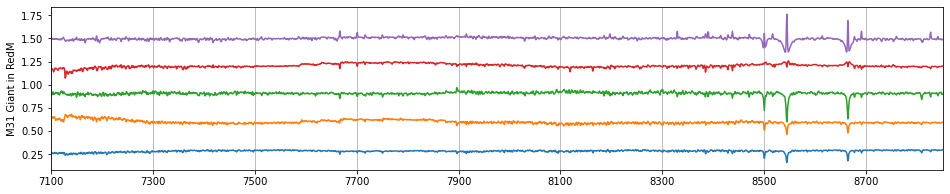

In [17]:
ds.init_pcp()

In [18]:
ds.flux.shape

(7689, 2204)

In [21]:
# k,q,prom = 10, 0.75, 0.1
k,q,prom = 5, 0.7, 0.02
peaks, prop, nvv= ds.get_peaks(k=k,q=q,prom=prom)

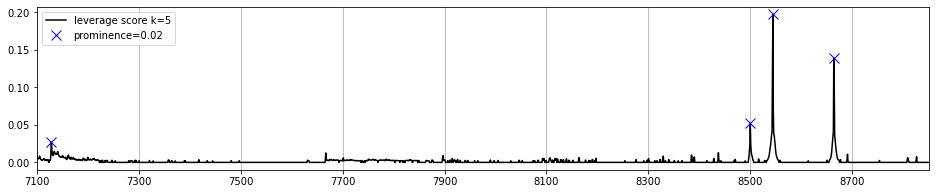

In [22]:
ds.plot_peaks(nvv, peaks, k, prom)

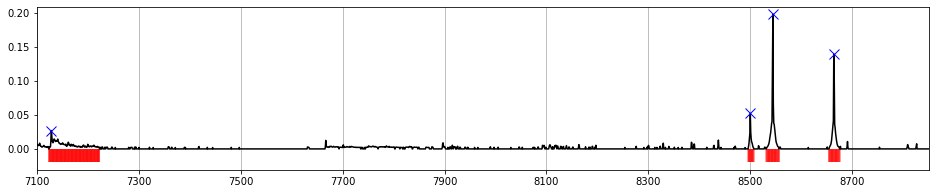

In [23]:
ds.plot_mask_from_peaks(peaks, prop, nvv)

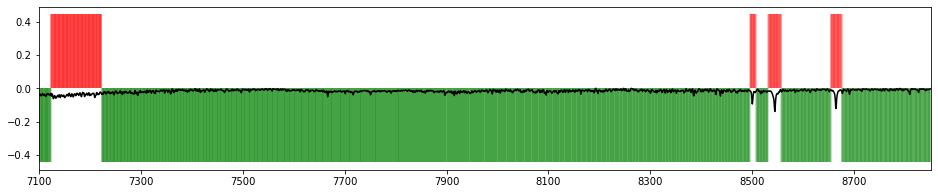

In [24]:
ds.plot_MN_mask(0)

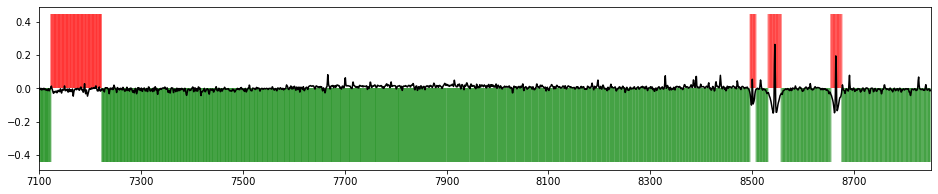

In [25]:
ds.plot_MN_mask(4)

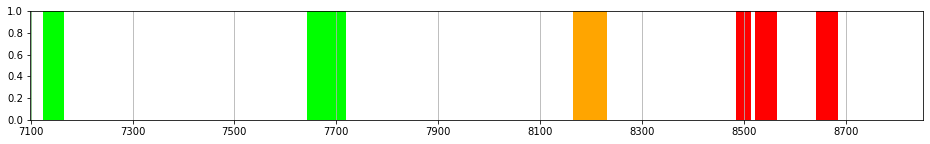

In [26]:
ds.plot_lick()

In [27]:
ds.get_MN(ds.nmask, top=5)

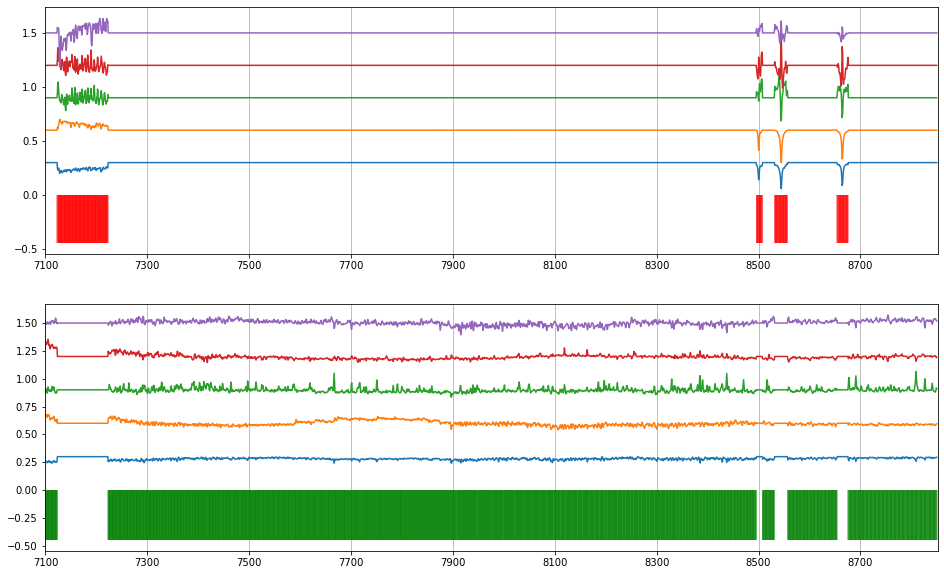

In [28]:
ds.plot_MN(step=0.3)

In [29]:
mu = 1.0 / ds.Mw[2]
ML, MS, MLv, MSv = ds._pcp(ds.M, delta=1e-5, mu=mu, lam=None, norm=None, maxiter=1000)

mu 0.02, lambda 0.0114, norm 114938.3


L(48, 208), S(30, 208)


(48, 2204)


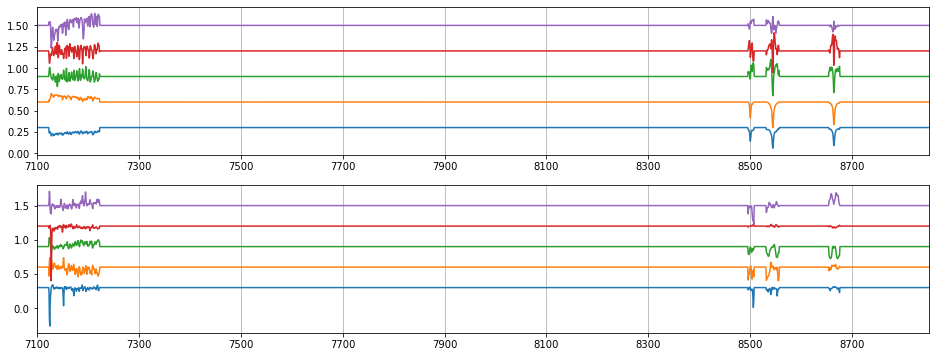

In [30]:
nMLv, nMSv =ds.eval_pcp(MLv, MSv)

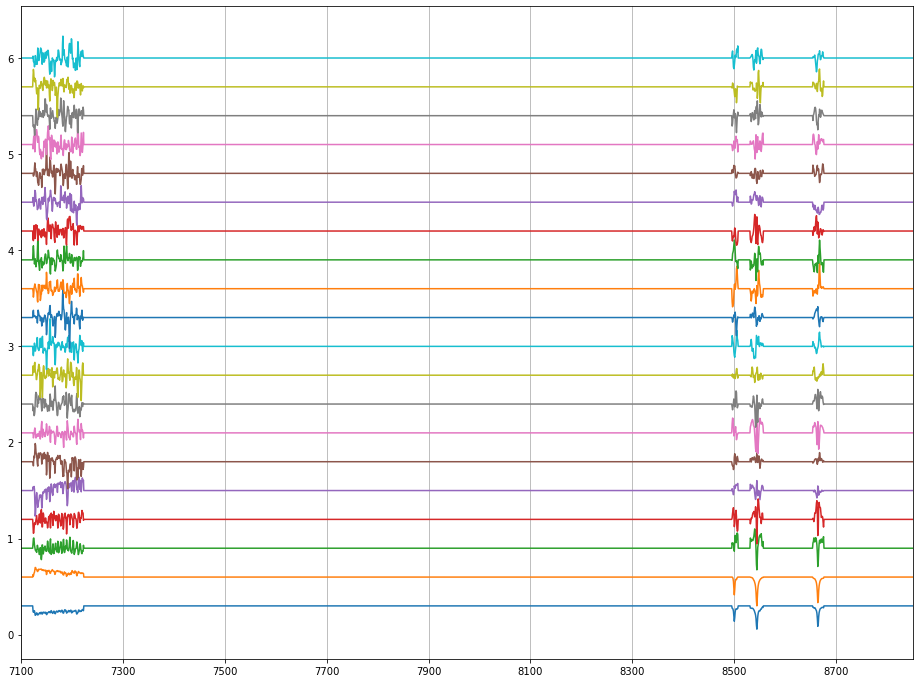

In [31]:
ds.plot_V(nMLv, top=20)

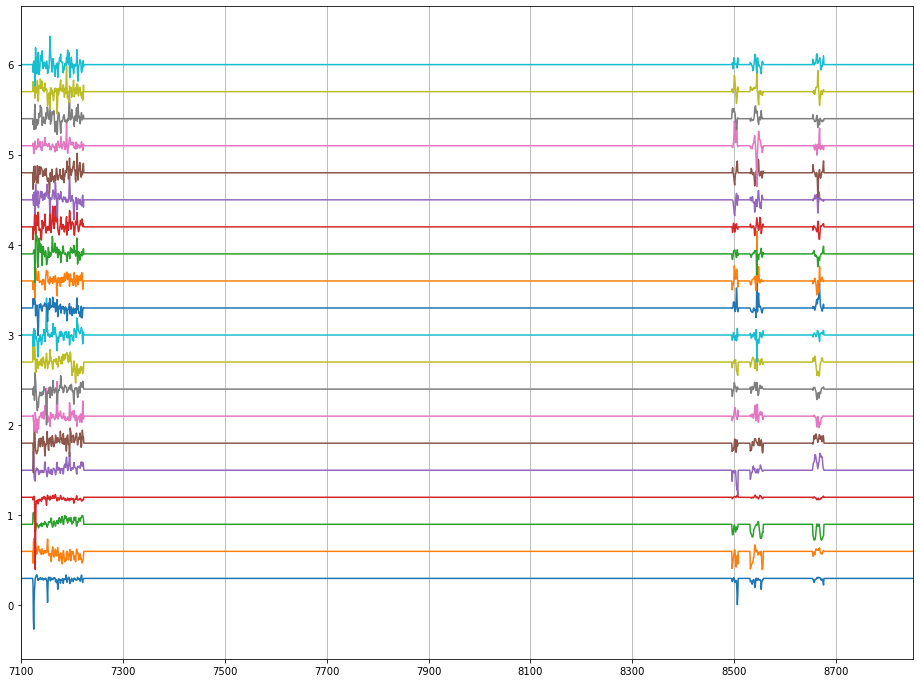

In [32]:
ds.plot_V(nMSv, top=20)

In [37]:
mu = 1.0 / ds.Nw[4]
NL, NS, NLv, NSv = ds._pcp(ds.N, delta=1e-6, mu=mu, lam=None, norm=None, maxiter=100)

mu 0.04, lambda 0.0114, norm 169656.9


L(68, 1996), S(30, 1996)


(68, 2204)


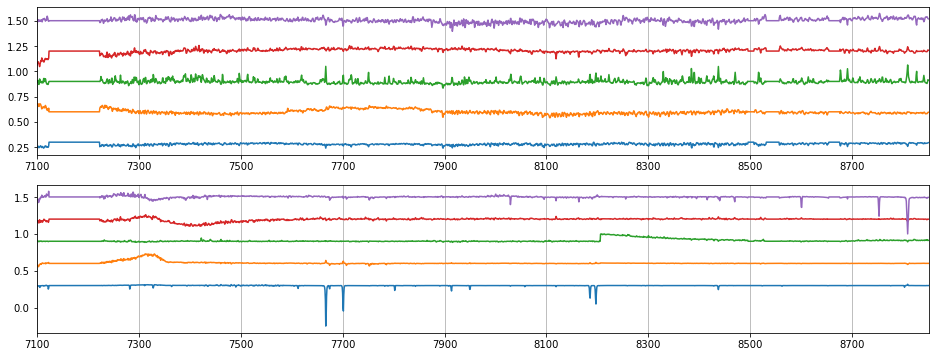

In [38]:
nNLv, nNSv = ds.eval_pcp(NLv, NSv, isM=0)

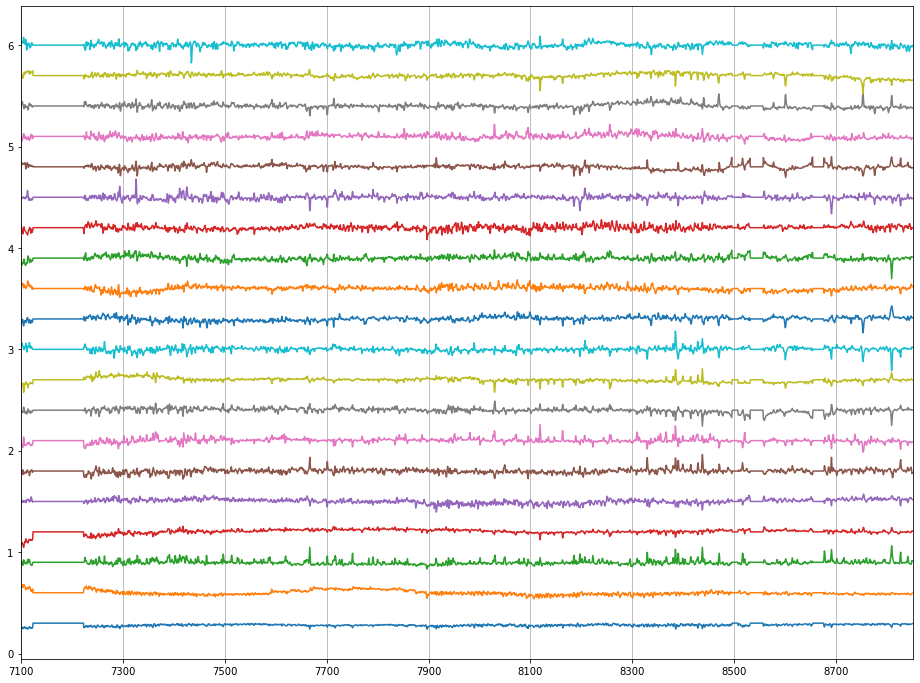

In [39]:
ds.plot_V(nNLv, top=20)

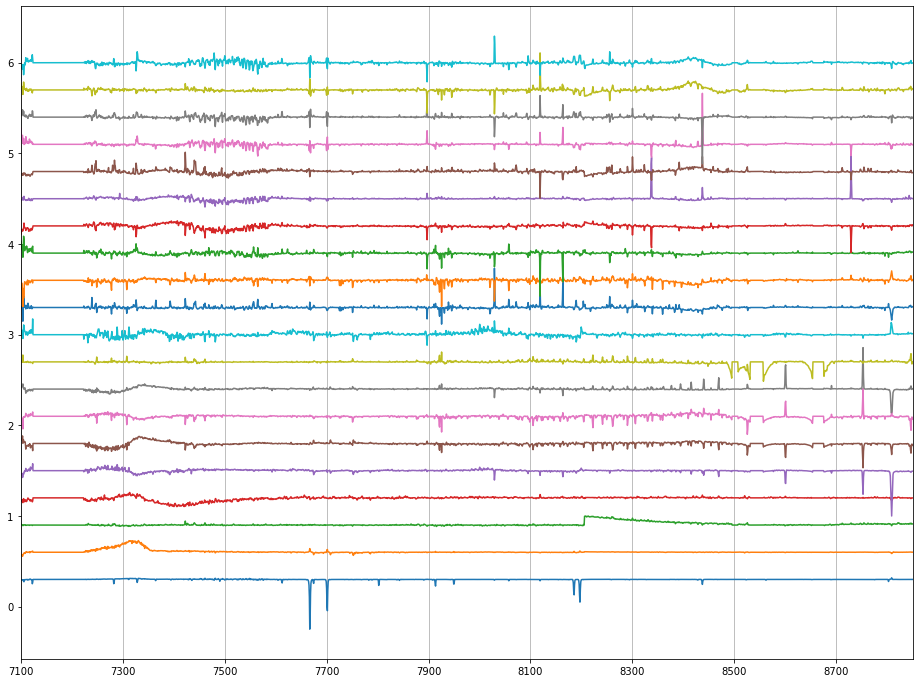

In [40]:
ds.plot_V(nNSv, top=20)

In [41]:
ds.pcp_transform(MLv, MSv, NLv, NSv, top=20)

In [ ]:
PATH= "/scratch/ceph/swei20/data/dnn//bosz_pcp0.h5"

In [43]:
ds.RNm = "M31G"

In [44]:
ds.pcp_np(save=1)

/scratch/ceph/swei20/data/dnn/M31G/bosz_pcp.h5


In [45]:
ds.Fs =  {"M": {}, "N": {}}
ds.Xdx = {"M": {}, "N": {}}

# Get informative lines

In [44]:
ds.prepare_lines()

In [47]:
ds.nPC=20
ds.nPC2=40

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 16, 17, 22, 24, 26, 31, 34, 36, 39}


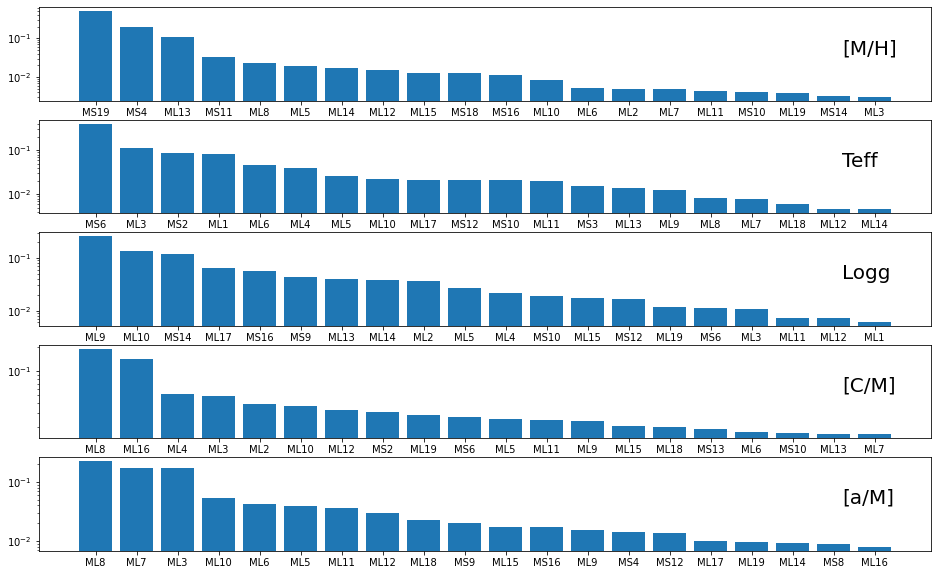

In [48]:
ds.get_all_Xrf(top=20, plot=1, X="M")

In [50]:
ds.prepare_lines()

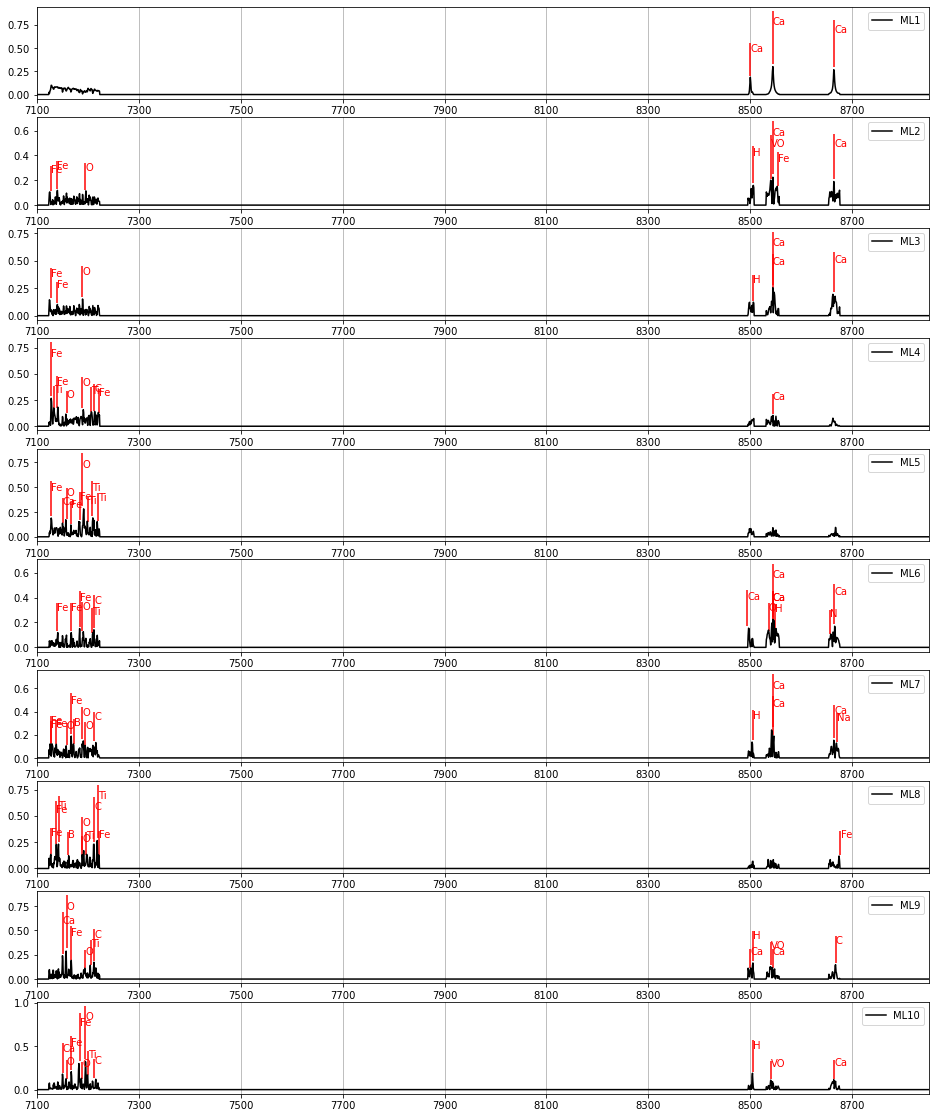

In [51]:
ds.plot_Xdx(top=10, X="M")

{1, 3, 7, 8, 10, 11, 12, 13, 14, 15, 17, 23, 24, 25, 28, 30, 32, 36, 38, 39}


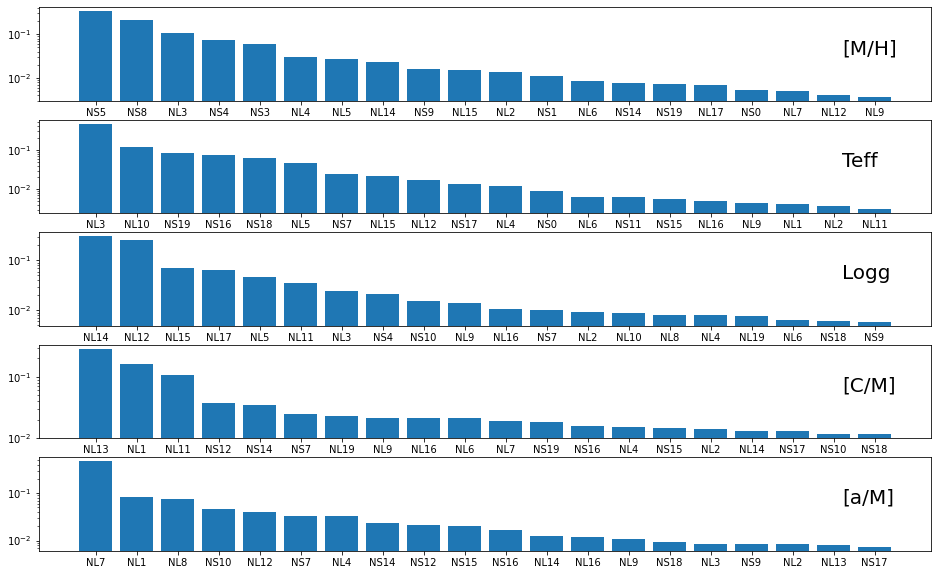

In [52]:
ds.get_all_Xrf(top=20, plot=1, X="N")

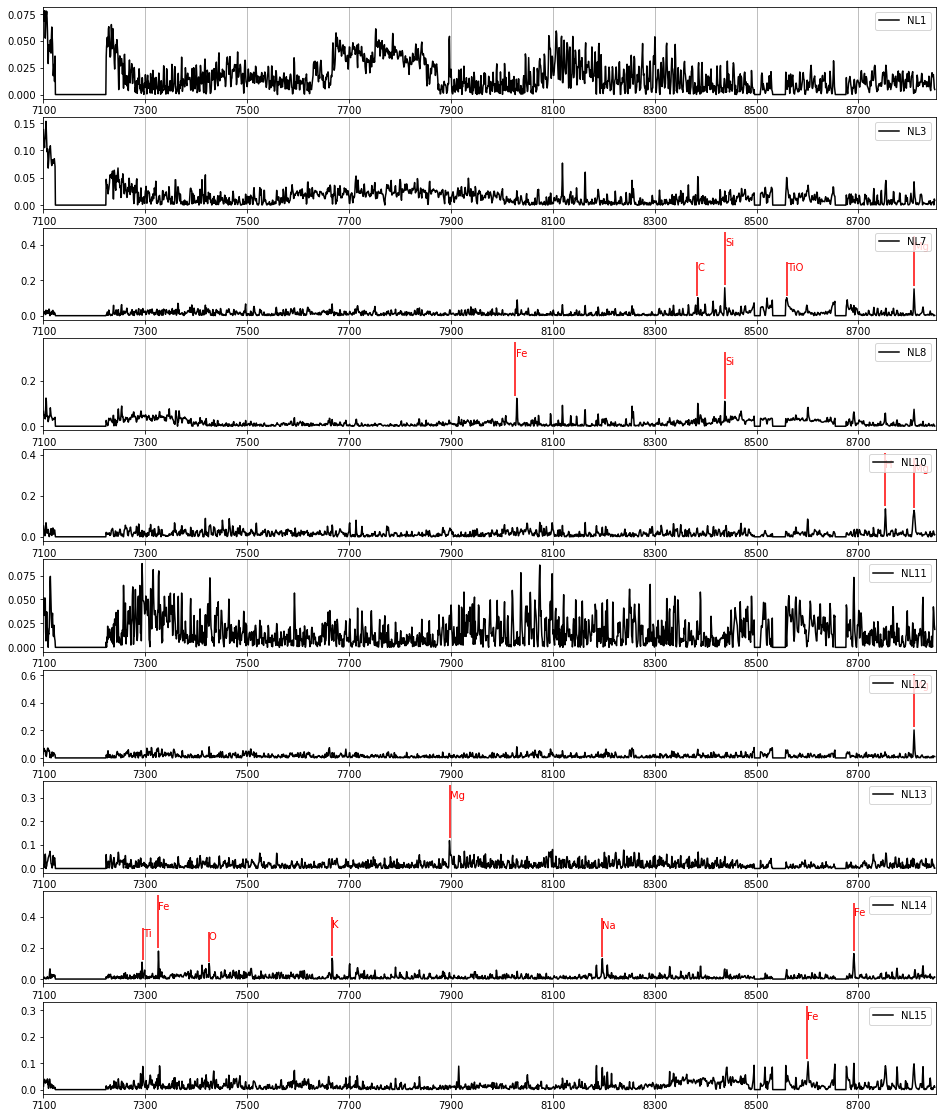

In [53]:
ds.plot_Xdx(top=10, X="N")

In [54]:
ds.save_dnn_rf()

In [ ]:
ds.nXv.shape

Rosie assginment Ca II H K lines.

How can we create add noise spectrum and find the box it belong.

Prototype. reduce resolution and noise

simialr to narrow band filters